<a href="https://colab.research.google.com/github/RaqeebShaikh12/Car-Price-Prediction-using-Multiple-Linear-Regression/blob/main/Car_Price_Prediction_using_Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear Regression
## Car Price Prediction

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

## Reading and Understanding the data

Now let us import the libraries and read the `car price` dataset.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded=files.upload()

Saving CarPrice_Assignment.csv to CarPrice_Assignment.csv


In [4]:
import io
 
df = pd.read_csv(io.BytesIO(uploaded['CarPrice_Assignment.csv']))


In [5]:
# Check the head of the dataset
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
df.shape

(205, 26)

Dataset contain `205 rows` and `26 columns`.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

We use `info()` method to get the data types of columns. In this 8 int, 8 float & 10 object data types are used. We can see that there are no `null values` in this dataset.

In [8]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


We have use `describe()` method to visualise the statistical parameter like count, mean, standard deviation, minimun, maximum, inter quantile value of the columns. By looking at its statistical parameter we cannot determine anything as it all looks fine so we have to check it through some other way.

## Cleaning the Data

Drop the columns which are not usefull in building the model.

Splitting `CompanyName` from `CarName` column.

In [34]:
CompanyName = df['CarName'].apply(lambda x : x.split(' ')[0])
df.insert(3,"CompanyName",CompanyName)

In [35]:
df.head()

,car_ID,symboling,CarName,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


`Fixing Invalid Values` : There seems to be some spelling error in the CompanyName column.<br>
1.  maxda=mazda
2.  Nissan=nissan
3.  porsche=porcshce
4.  toyouta=toyota
5.  vokswagen=volkswagen=vw

In [57]:
df['CompanyName'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: CompanyName, dtype: int64

In [38]:
df["CompanyName"] = df["CompanyName"].str.lower()

def replace_name(a,b):
    df["CompanyName"].replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

df["CompanyName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [39]:
df3=df.drop(['car_ID','CarName','doornumber'],axis=1)
df3.head()

,symboling,CompanyName,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Visualising the Data

Let's visualise the data with the help of `matplotlib` & `seaborn` library.

#### Visualising Numeric Variable

Let's make a `pairplot` for all the numeric variables.

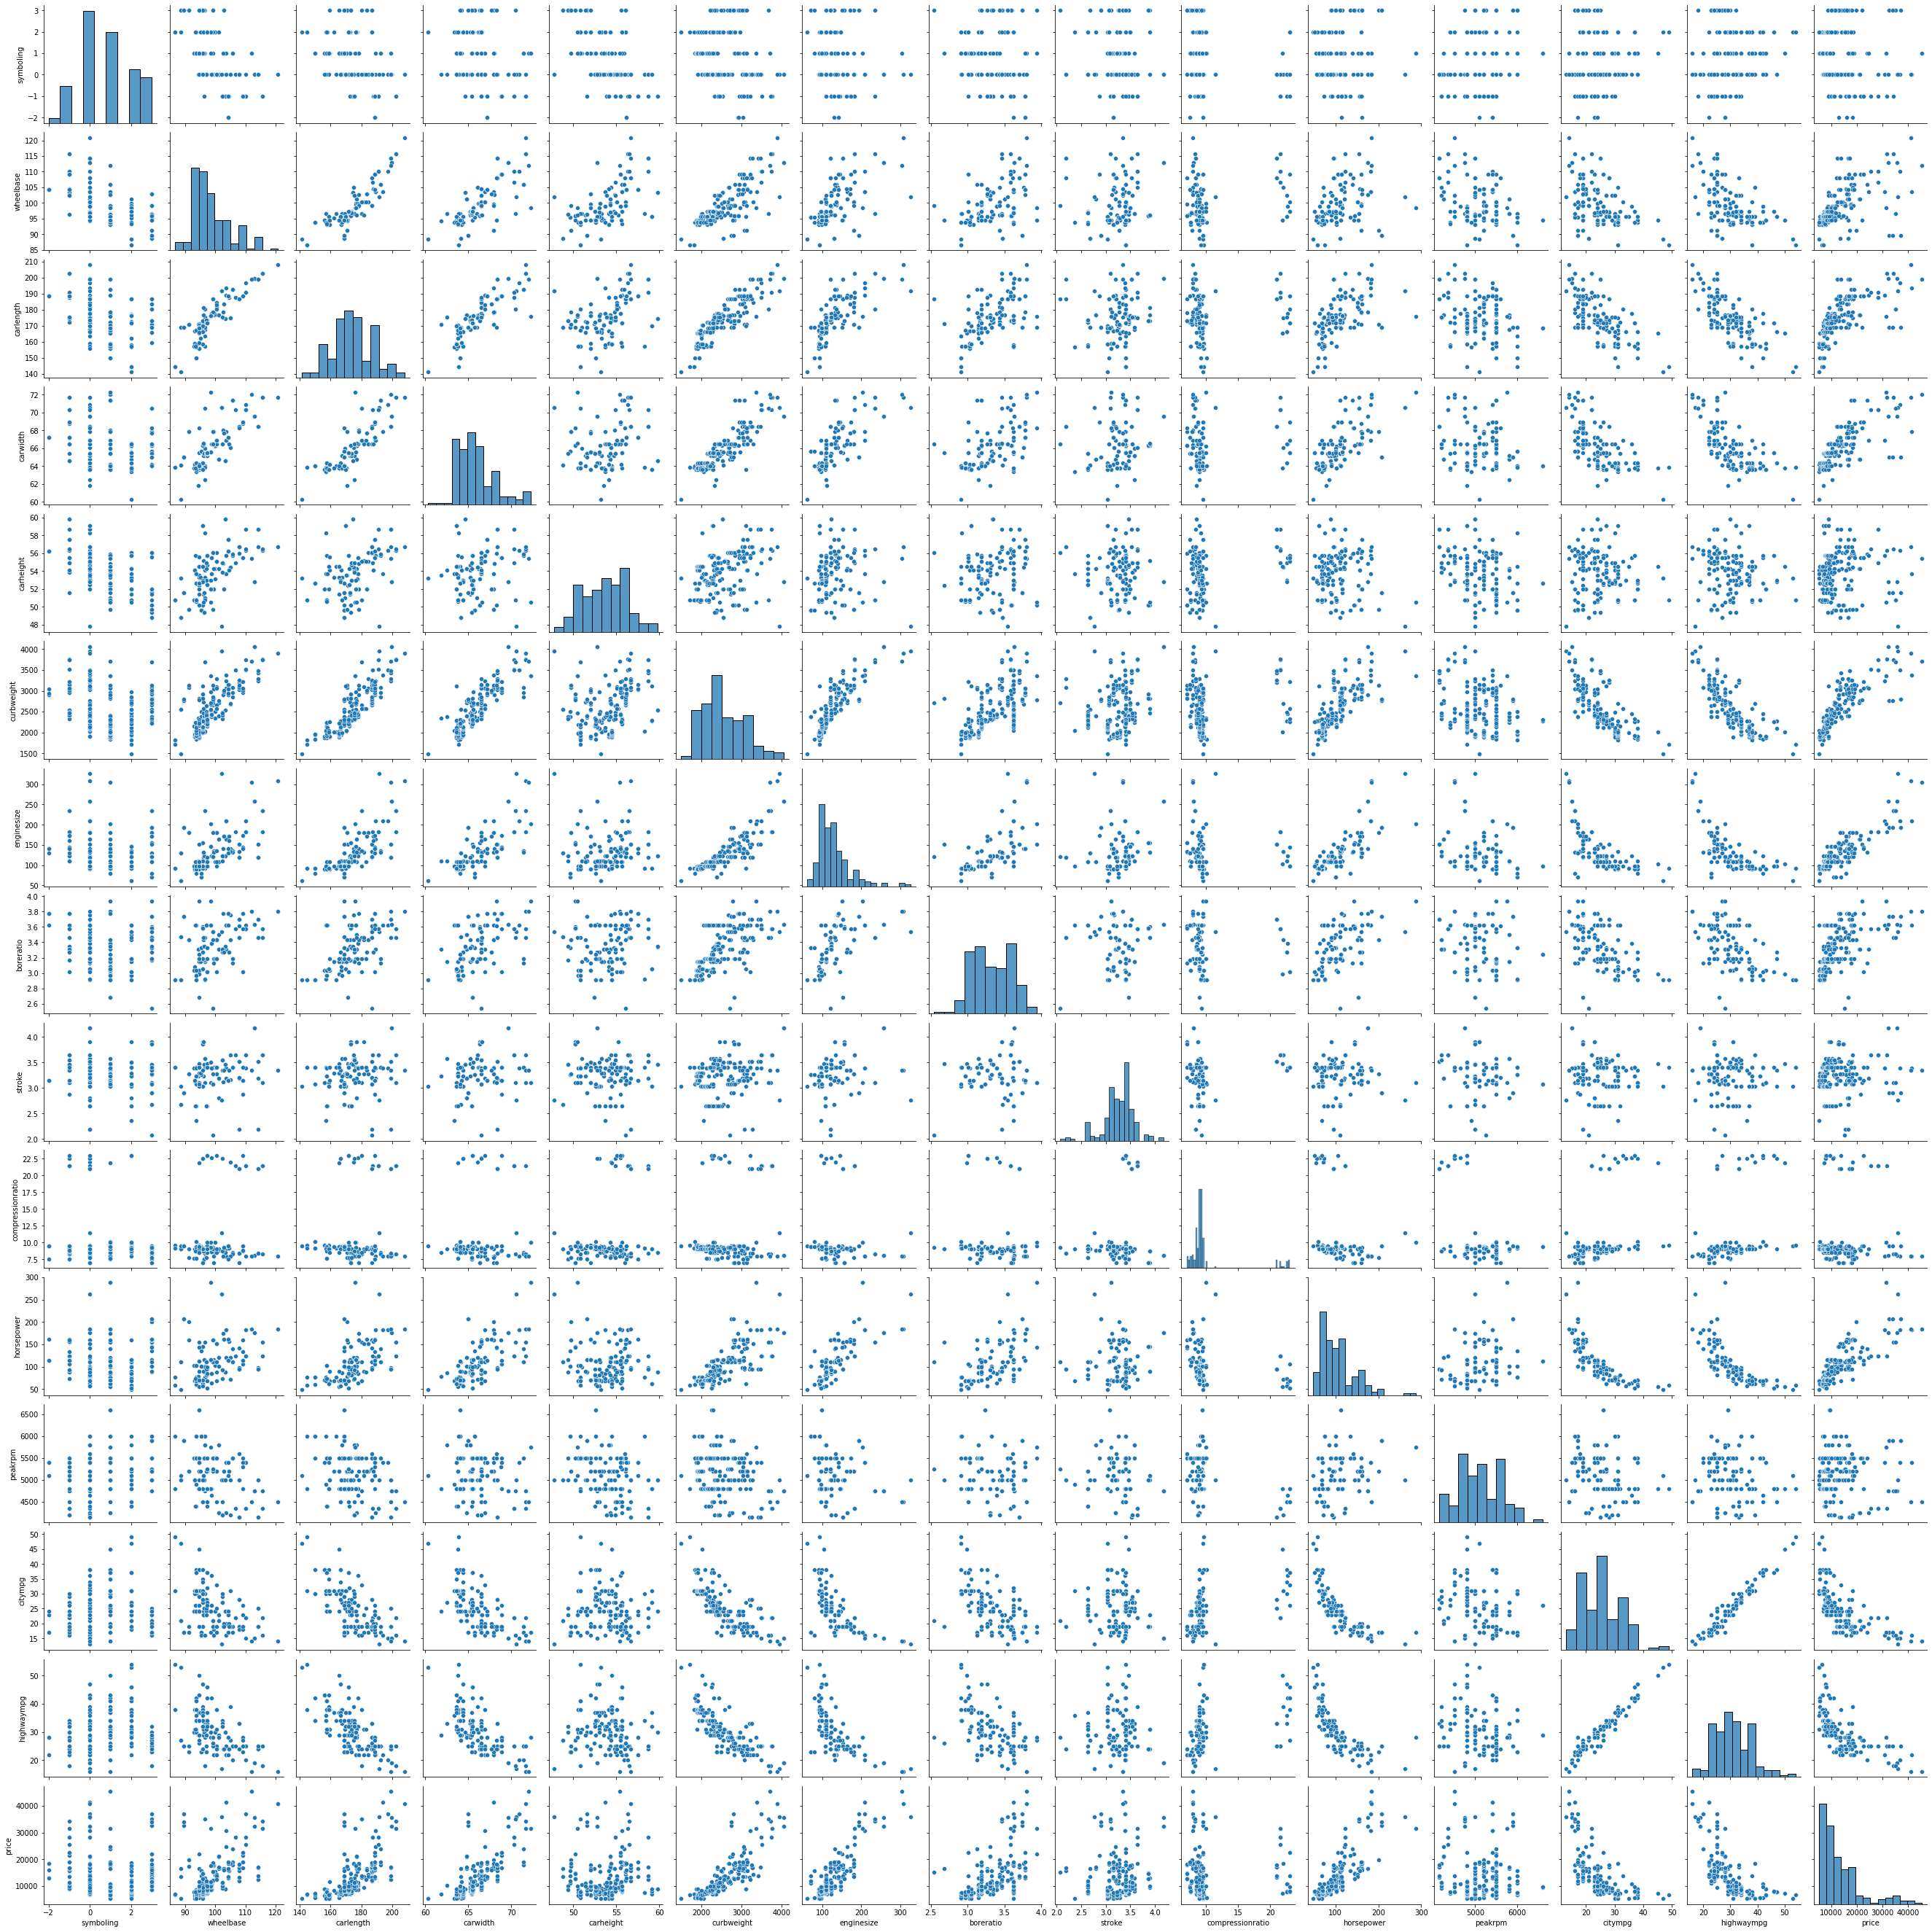

In [40]:
sns.pairplot(df3)
plt.show()

As we can see our target variable is having some correlation with predictor variables which means we can build our model using multiple linear regression.

#### Visualising Categorical Variable

Let's Visualise by making `boxplot` for these categorical variables.

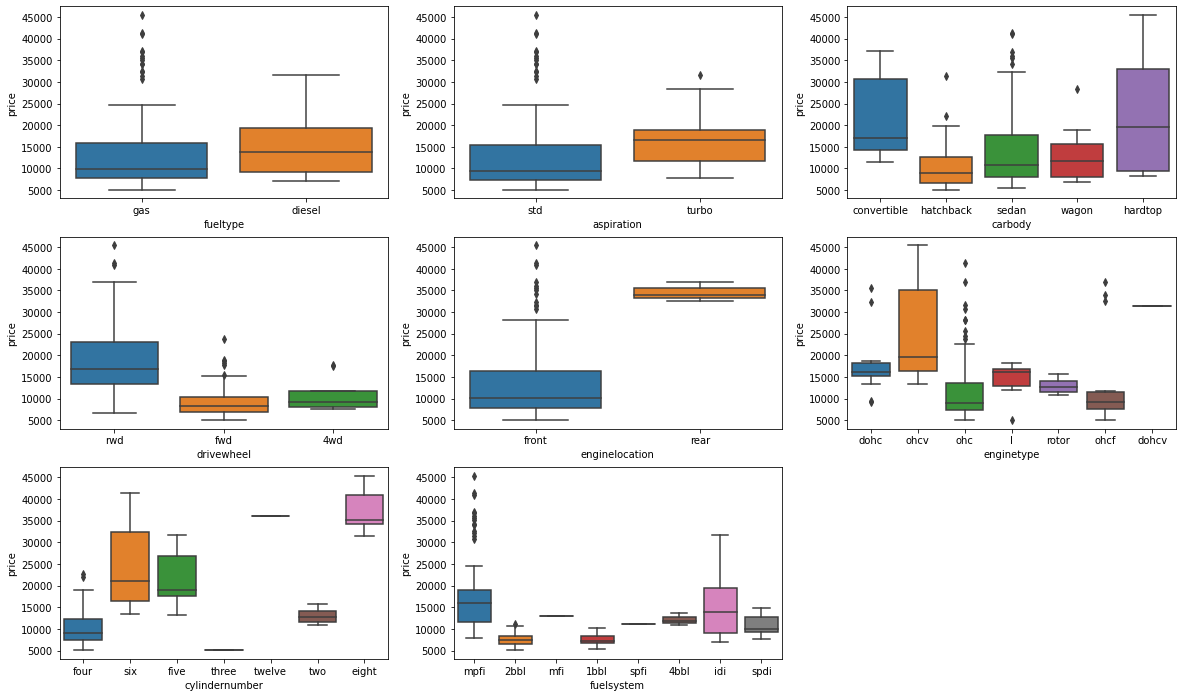

In [41]:
plt.figure(figsize=(20, 12))

plt.subplot(3,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = df3)

plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = df3)

plt.subplot(3,3,3)
sns.boxplot(x = 'carbody', y = 'price', data = df3)

plt.subplot(3,3,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = df3)

plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = df3)

plt.subplot(3,3,6)
sns.boxplot(x = 'enginetype', y = 'price', data = df3)

plt.subplot(3,3,7)
sns.boxplot(x = 'cylindernumber', y = 'price', data = df3)

plt.subplot(3,3,8)
sns.boxplot(x = 'fuelsystem', y = 'price', data = df3)

plt.show()

We can see the variation of price with different factors in the boxplot but to make sure on which it depend the most and the least we have to build the model.

We can also visualise some of these categorical features parallely by using the `hue` argument. Below is the plot for `driverwheel` with `enginelocation` as the hue.

## Data Preparation

As we can see our columns have string value but in order to fit a regression line, we would need numerical values. Hence, we need to convert them. For this, we will use something called `dummy variables`.

In [42]:
df3 = pd.get_dummies(df3, columns=['fueltype','aspiration','carbody','drivewheel','enginelocation','fuelsystem','cylindernumber','enginetype'],drop_first=True)

In [43]:
df3.head()

,symboling,CompanyName,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,3,alfa-romero,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,0,0,0
1,3,alfa-romero,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,0,0,0
2,1,alfa-romero,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,1,0,0,0,0,0,0,0,1,0
3,2,audi,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,1,0,0,0
4,2,audi,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,1,0,0,0


Now we have to deal with column `CompanyName` we will do encoding in this to convert into integer.

In [58]:
df3['CompanyName']=df3['CompanyName'].map({'toyota': 1, 'nissan': 2, 'mazda' : 3, 'mitsubishi': 4, 'honda': 5, 'volkswagen': 6, 'subaru': 7, 'peugeot': 8, 'volvo': 9, 'dodge': 10, 'buick': 11, 'bmw': 12, 'audi': 13, 'plymouth': 14, 'saab': 15, 'porsche': 16, 'isuzu': 17, 'jaguar': 18, 'chevrolet': 19, 'alfa-romero': 20, 'renault': 21, 'mercury': 22})

Now our data set is ready we should split it into train and test set.

## Splitting the Data into Training and Testing Sets

In [59]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df3, train_size = 0.7, test_size = 0.3, random_state = 100)

## Rescaling the Features

We will use `Min-Max Scaling` method.

In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

In [61]:
num_vars=['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

In [62]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


In [63]:
df_train.head()

,symboling,CompanyName,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
122,1,14,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,...,0,0,0,0,0,0,1,0,0,0
125,3,16,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,...,0,0,0,0,0,0,1,0,0,0
166,1,1,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,...,0,0,0,0,0,0,0,0,0,0
1,3,20,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,...,0,0,0,0,0,0,0,0,0,0
199,-1,9,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,...,0,0,0,0,0,0,1,0,0,0


Now Let's see the correlation coefficient to check which variable is highly correlated.

In [64]:
df_train.corr()

,symboling,CompanyName,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
symboling,1.000000,0.038738,-0.539877,-0.390880,-0.263917,-0.557179,-0.268481,-0.182393,-0.132768,-0.028788,...,-0.071684,0.084692,-0.056133,0.313538,0.014279,-0.125030,-0.064765,-0.054312,-0.028385,0.313538
CompanyName,0.038738,1.000000,0.095164,0.157086,0.208065,-0.145101,0.248410,0.301530,0.161993,-0.034002,...,0.072919,0.172493,0.157517,-0.135707,0.127563,0.080464,-0.108268,0.014448,0.049630,-0.135707
wheelbase,-0.539877,0.095164,1.000000,0.877909,0.796888,0.555524,0.792815,0.588600,0.482386,0.224970,...,0.283534,-0.142992,0.049113,-0.092032,-0.001739,0.406623,-0.222195,-0.135755,0.108535,-0.092032
carlength,-0.390880,0.157086,0.877909,1.000000,0.846307,0.454721,0.881495,0.702794,0.620436,0.176814,...,0.355099,-0.216024,0.122216,-0.059682,0.015262,0.253571,-0.293690,-0.086593,0.211595,-0.059682
carwidth,-0.263917,0.208065,0.796888,0.846307,1.000000,0.245022,0.873884,0.754925,0.580962,0.233631,...,0.271178,-0.210698,0.181043,-0.010753,0.245699,0.193688,-0.290778,-0.108346,0.305924,-0.010753
carheight,-0.557179,-0.145101,0.555524,0.454721,0.245022,1.000000,0.272388,0.045042,0.160835,0.003588,...,0.001842,-0.012171,-0.199022,-0.276412,-0.105596,0.334046,0.075929,-0.017898,-0.099329,-0.276412
curbweight,-0.268481,0.248410,0.792815,0.881495,0.873884,0.272388,1.000000,0.865102,0.625759,0.209277,...,0.455979,-0.162583,0.218088,-0.040089,0.127791,0.237870,-0.412737,-0.100522,0.370775,-0.040089
enginesize,-0.182393,0.301530,0.588600,0.702794,0.754925,0.045042,0.865102,1.000000,0.545157,0.228768,...,0.561996,-0.131452,0.413197,-0.217946,0.160398,0.027066,-0.337783,-0.079374,0.506634,-0.217946
boreratio,-0.132768,0.161993,0.482386,0.620436,0.580962,0.160835,0.625759,0.545157,1.000000,-0.152836,...,0.110833,-0.128229,0.075047,0.014733,0.204110,0.214048,-0.473985,0.375397,0.074544,0.014733
stroke,-0.028788,-0.034002,0.224970,0.176814,0.233631,0.003588,0.209277,0.228768,-0.152836,1.000000,...,0.136186,-0.059299,-0.132053,0.002685,-0.037743,-0.033344,0.384066,-0.594501,-0.080499,0.002685


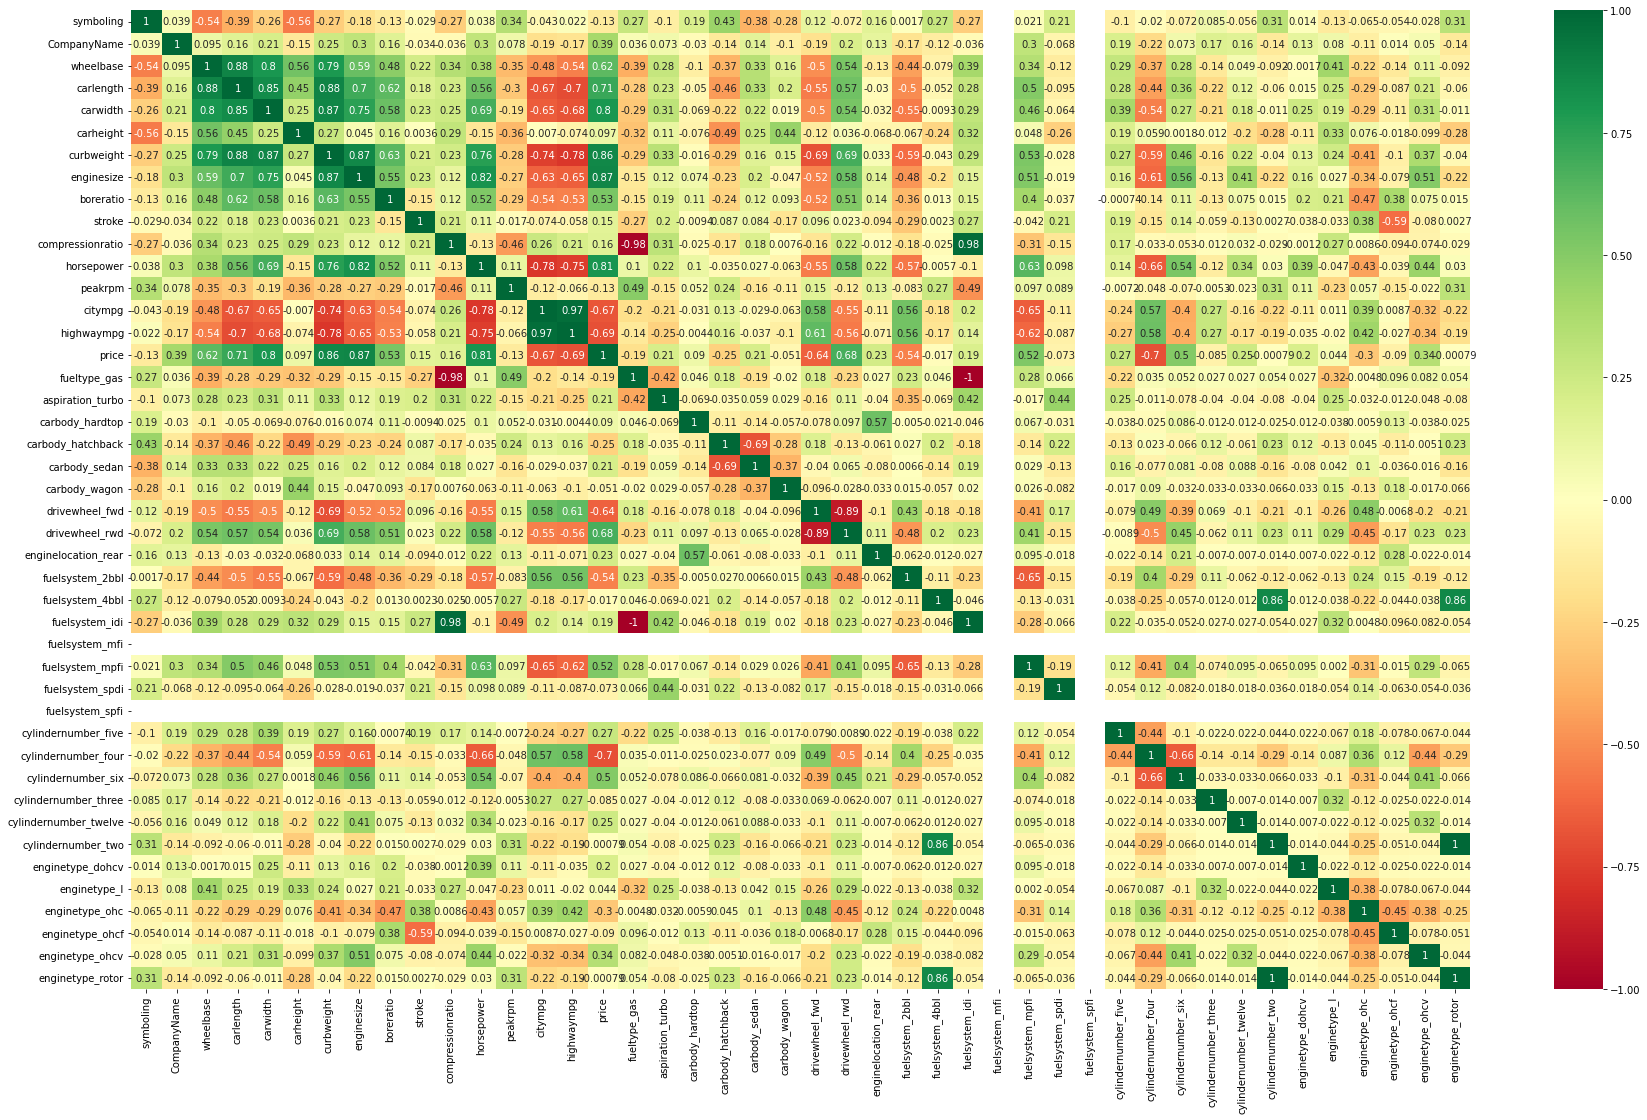

In [65]:
plt.figure(figsize = (30, 18))
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

As you might have noticed there are few columns that are correlated to `price`. Let's move to our next step for building a model.

#### Dividing into X and Y sets for the model building

In [66]:
y_train = df_train.pop('price')
X_train = df_train

## Building a Linear Model

We will be adding all the variables to the model

In [67]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const                   -1.494231e-02
symboling                8.107770e-03
CompanyName              3.196639e-03
wheelbase                1.240161e-01
carlength               -6.779163e-02
carwidth                 2.562677e-01
carheight                5.295962e-02
curbweight               6.306940e-02
enginesize               1.367844e+00
boreratio               -2.613421e-01
stroke                  -4.007754e-01
compressionratio        -2.317334e-01
horsepower               3.417656e-01
peakrpm                  8.104559e-02
citympg                 -1.237882e-01
highwaympg               1.741893e-01
fueltype_gas            -1.312464e-01
aspiration_turbo         3.384548e-02
carbody_hardtop         -7.652320e-02
carbody_hatchback       -8.223379e-02
carbody_sedan           -6.196932e-02
carbody_wagon           -6.649887e-02
drivewheel_fwd          -1.679173e-02
drivewheel_rwd           2.104928e-02
enginelocation_rear      1.618996e-01
fuelsystem_2bbl         -7.653382e-03
fuelsystem_4

These are the coefficient of all the column

In [68]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     50.25
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           1.42e-51
Time:                        16:20:10   Log-Likelihood:                 231.24
No. Observations:                 143   AIC:                            -382.5
Df Residuals:                     103   BIC:                            -264.0
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.01

Looking at the `p-values`, it looks like some of the variables aren't really significant (in the presence of other variables).
We could simply drop the variable with the highest, non-significant `p-value`. A better way would be to supplement this with the `VIF` information.

#### Checking VIF